<a href="https://colab.research.google.com/github/MuhammadNurilHuda/NLP-Project-and-Documentation/blob/main/Simple_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sastrawi
!pip install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

In [ ]:
dictionary = {
    "teks":["pembelajaran sangat menarik, banyak terjadi diskusi",
            "pemateri sangat bagus, tetapi ada sedikit kekurangan",
            "sudah cukup bagus",
            "kurang terjadi diskusi",
            "kelas tidak berjalan dengan lancar, terlalu banyak kendala dari pemateri",
            "pemateri kurang bisa membawakan materi",
            "kelas tidak bagus, tidak terjadi kolaborasi",
            "sangat bagus, pemateri sangat hebat"],

    "label":["positif",
             "positif",
             "positif",
             "negatif",
             "negatif",
             "negatif",
             "negatif",
             "positif"]
}

df=pd.DataFrame(dictionary)
df.head()

,teks,label
0,"pembelajaran sangat menarik, banyak terjadi di...",positif
1,"pemateri sangat bagus, tetapi ada sedikit keku...",positif
2,sudah cukup bagus,positif
3,kurang terjadi diskusi,negatif
4,"kelas tidak berjalan dengan lancar, terlalu ba...",negatif


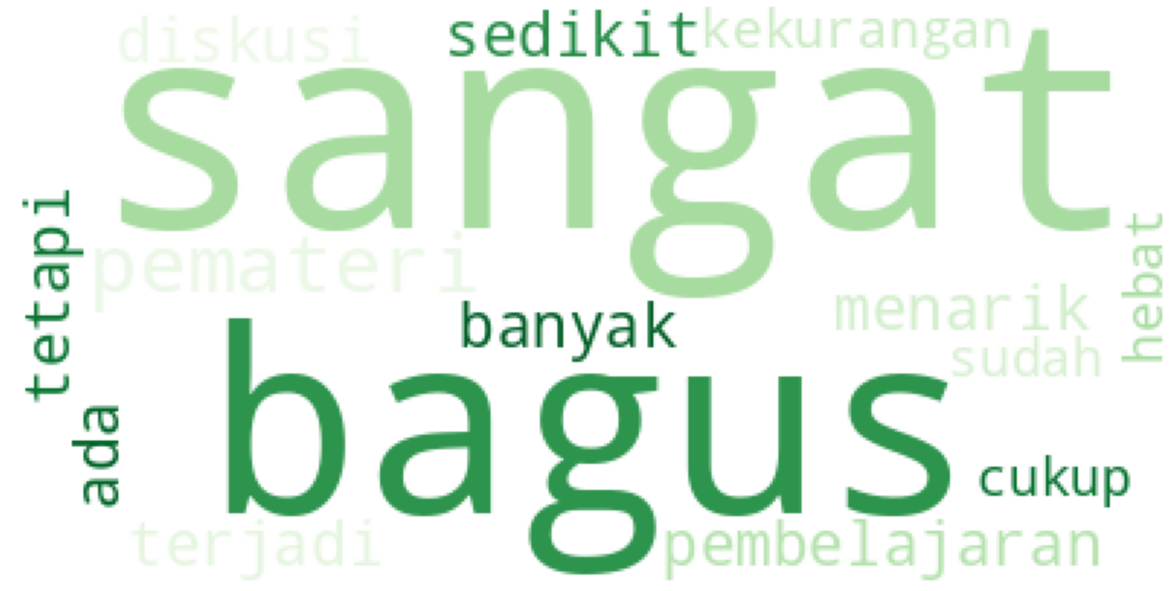

In [ ]:
positif = df[df['label']=="positif"]
all_teks = ' '.join(word for word in positif['teks'])
wordcloud = WordCloud(colormap='Greens', background_color='white').generate(all_teks)
plt.figure(figsize=(30,30), dpi=50)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

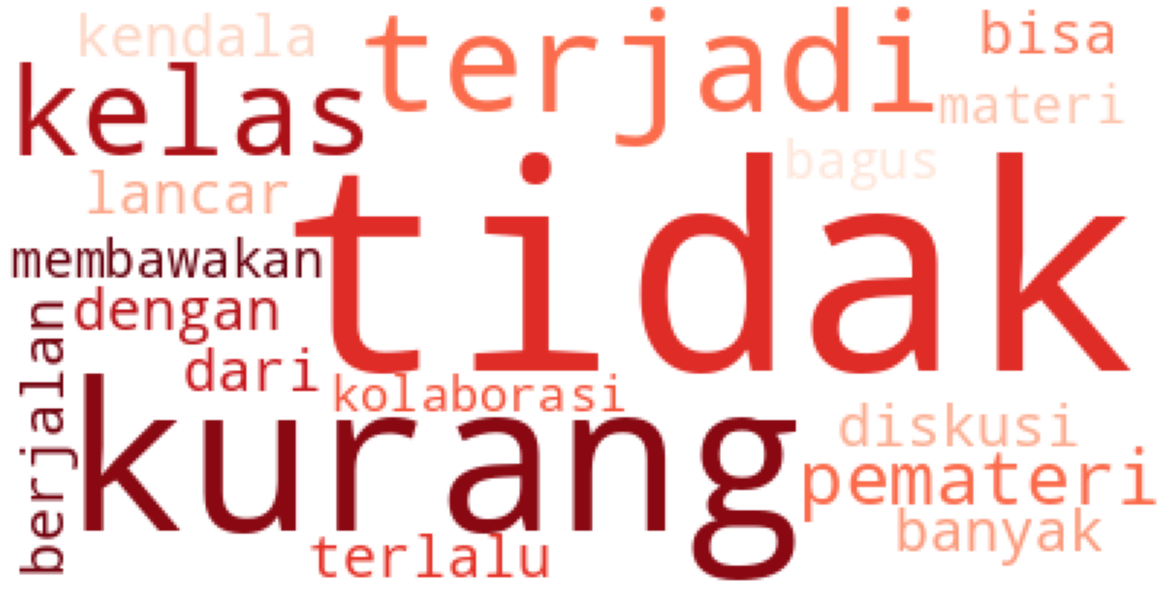

In [ ]:
negatif = df[df['label']=="negatif"]
all_teks = ' '.join(word for word in negatif['teks'])
wordcloud = WordCloud(colormap='Reds', background_color='white').generate(all_teks)
plt.figure(figsize=(30,30), dpi=50)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

# all indonesian stopwords
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword, aliakbar_stopword, pebahasa_stopword, elang_stopword]

stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_stop_words = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl sm plg skrg
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopwords = set(custom_stop_words.split())

# result stopwords
stop_words = st_words | custom_stopwords
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['diberi', 'diperlukan', 'seingat', 'seraya', 'yakin']


In [ ]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

# tokenization
def tokenize(text):
    return word_tokenize(text)

In [ ]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [ ]:
# implement preprocessing
preprocessed_df = df.copy()
preprocessed_df['teks'] = df['teks'].map(preprocess)
preprocessed_df.head()

,teks,label
0,"[ajar, tarik, diskusi]",positif
1,"[materi, bagus, kurang]",positif
2,[bagus],positif
3,[diskusi],negatif
4,"[kelas, lancar, kendala, materi]",negatif


In [ ]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['teks']
y = preprocessed_data['label']
y = y.map({'negatif':0, 'positif':1})

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5,), (5,), (3,), (3,))

In [ ]:
x_train.head()

0              [ajar, tarik, diskusi]
4    [kelas, lancar, kendala, materi]
7              [bagus, materi, hebat]
1                     [materi, bagus]
5              [materi, bawa, materi]
Name: teks, dtype: object

In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11


In [ ]:
# check frequency
# print(f"Freq dari 'kurang' untuk sentiment 'positive': {freqs[('kurang', 1)]}")
# print(f"Freq dari 'kurang' untuk sentiment 'negative': {freqs[('kurang', 0)]}")

# Modeling Logistic regression

In [ ]:
def extract_features(tweet, freqs):
    '''
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in tweet:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)

    assert(x.shape == (1, 3))
    return x

In [ ]:
# test extract features function
tmp = extract_features(x_train.to_numpy()[0], freqs)

print(f'text: {x_train.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text: ['ajar', 'tarik', 'diskusi']
feature extraction result: [[1. 3. 0.]]


In [ ]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(x_train), 3))
for i in range(len(x_train)):
    X_train[i, :]= extract_features(x_train.to_numpy()[i], freqs)

X_train[:5]

array([[1., 3., 0.],
       [1., 2., 6.],
       [1., 5., 3.],
       [1., 4., 3.],
       [1., 4., 7.]])

In [ ]:
# create sigmoid function
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))

    return h

In [ ]:
# create gradient descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x,theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        # update the weights theta
        theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

    J = float(J)
    return J, theta

In [ ]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [ ]:
# training labels corresponding to X
y_train = np.expand_dims(y_train.to_numpy(), axis=1)

# Apply gradient descent
init_theta = np.zeros((3, 1))
init_alpha = 1e-4
iter = 3000

J, theta = gradientDescent(X_train, y_train, init_theta, init_alpha, iter)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.49712869.
The resulting vector of weights is [0.03032274, 0.17252828, -0.16633809]


In [ ]:
def predict_text(text, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''

    # extract the features of the tweet and store it into x
    x = extract_features(text,freqs)
    print(x)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    return y_pred

In [ ]:
for text in x_test:
    print( '%s -> %f' % (text, predict_text(text, freqs, theta)))

[[1. 1. 0.]]
['diskusi'] -> 0.550540
[[1. 2. 1.]]
['kelas', 'bagus', 'kolaborasi'] -> 0.552071
[[1. 2. 0.]]
['bagus'] -> 0.592758


In [ ]:
y_hat = []

for text in x_test:
    # get the label prediction for the teks
    y_pred = predict_text(text, freqs, theta)

    if y_pred > 0.5:
        # append 1.0 to the list
        y_hat.append(1)
    else:
        # append 0 to the list
        y_hat.append(0)

[[1. 1. 0.]]
[[1. 2. 1.]]
[[1. 2. 0.]]


In [ ]:
# calculate accuracy
accuracy = (y_hat==np.squeeze(y_test)).sum()/len(x_test)

print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.3333


# Predict new data

In [ ]:
new_dict = {
    "teks" : ["Kelas kurang berjalan dengan baik, tetapi pemateri bagus",
              "pemateri kurang hebat dalam membawakan materi",
              "kelas sangat bagus dan memberikan pengetahuan baru",
              "sangat memahami materi, pemateri hebat, materi sangat jelas"]
}

new_df = pd.DataFrame(new_dict)
new_df.head()

,teks
0,"Kelas kurang berjalan dengan baik, tetapi pema..."
1,pemateri kurang hebat dalam membawakan materi
2,kelas sangat bagus dan memberikan pengetahuan ...
3,"sangat memahami materi, pemateri hebat, materi..."


In [ ]:
preprocessed_new_df = new_df.copy()
preprocessed_new_df['teks'] = new_df['teks'].map(preprocess)
preprocessed_new_df.head()

,teks
0,"[kelas, materi, bagus]"
1,"[materi, hebat, bawa, materi]"
2,"[kelas, bagus, tahu]"
3,"[paham, materi, materi, hebat, materi]"


In [ ]:
for text in preprocessed_new_df['teks']:
    print( '%s -> %f' % (text, predict_text(text, freqs, theta)))

[[1. 4. 4.]]
['kelas', 'materi', 'bagus'] -> 0.513767
[[1. 5. 7.]]
['materi', 'hebat', 'bawa', 'materi'] -> 0.432563
[[1. 2. 1.]]
['kelas', 'bagus', 'tahu'] -> 0.552071
[[1. 7. 9.]]
['paham', 'materi', 'materi', 'hebat', 'materi'] -> 0.435604


In [ ]:
y_hat = []

for text in x_test:
    # get the label prediction for the teks
    y_pred = predict_text(text, freqs, theta)

    if y_pred > 0.5:
        # append 1.0 to the list
        y_hat.append(1)
    else:
        # append 0 to the list
        y_hat.append(0)

[[1. 4. 4.]]
[[1. 5. 7.]]
[[1. 2. 1.]]
[[1. 7. 9.]]


In [ ]:
y_hat

[1, 0, 1, 0]

In [ ]:
new_df['predict'] = y_hat

# Map 0 to 'negatif' and 1 to 'positif'
new_df['predict'] = new_df['predict'].map({0: 'negatif', 1: 'positif'})
new_df.head()

,teks,predict
0,"Kelas kurang berjalan dengan baik, tetapi pema...",positif
1,pemateri kurang hebat dalam membawakan materi,negatif
2,kelas sangat bagus dan memberikan pengetahuan ...,positif
3,"sangat memahami materi, pemateri hebat, materi...",negatif
